<a href="https://colab.research.google.com/github/potgieterphiline/UdemyTrainingCode/blob/main/KNN_vs_LinReg_LinearData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
inputs, target = make_regression(n_samples=100, n_features=1, noise = 15, random_state=365)

In [ ]:
target = target /50

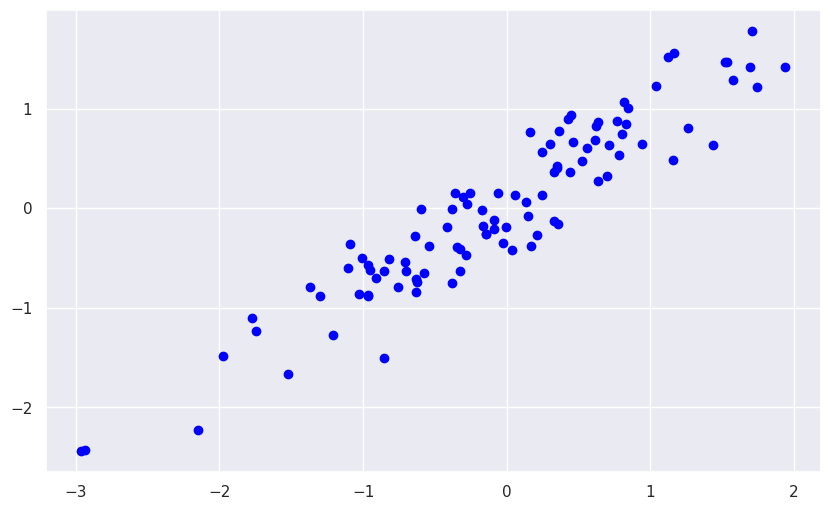

In [ ]:
sns.set()

plt.figure(figsize=(10, 6))

plt.scatter(inputs, target, color='blue', label='Training Data')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

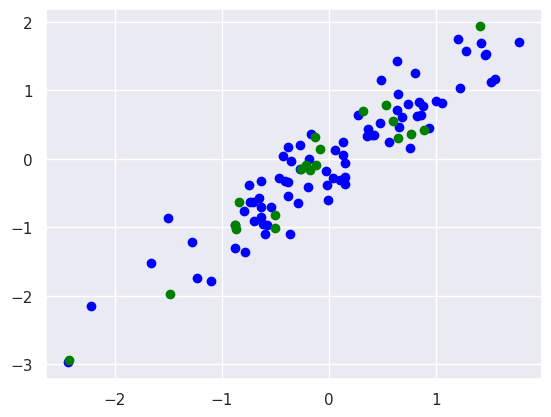

In [ ]:
sns.set()

plt.scatter(y_train, x_train, color='blue', label='Training Data')
plt.scatter(y_test, x_test, color= 'green', label = 'Test Data')


In [ ]:
clf = LinearRegression()

clf = clf.fit(x_train, y_train)

y_test_pred = clf.predict(x_test)

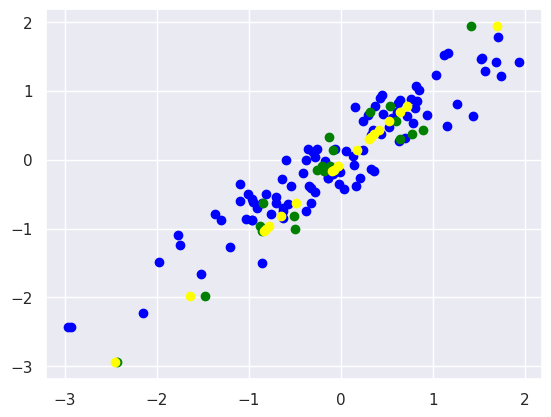

In [ ]:
sns.set()

plt.scatter(inputs, target, color='blue', label='Actual Data')
plt.scatter(y_test, x_test, color= 'green', label = 'Test Data')
plt.scatter(y_test_pred, x_test, color= 'yellow', label = 'Predicted Data')

In [ ]:
MSE = mean_squared_error(y_test, y_test_pred)
R2 = r2_score(y_test, y_test_pred)

MSE, R2

(0.06847905469625096, 0.908912379210725)

In [ ]:
clf2 = KNeighborsRegressor(n_neighbors = 10)
clf2.fit(x_test,y_test)
y_test_pred2 = clf2.predict(x_test)


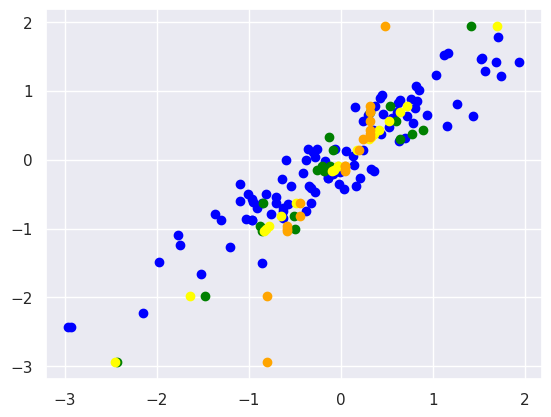

In [ ]:
sns.set()

plt.scatter(inputs, target, color='blue', label='Actual Data')
plt.scatter(y_test, x_test, color= 'green', label = 'Test Data')
plt.scatter(y_test_pred, x_test, color= 'yellow', label = 'Predicted Data LR')
plt.scatter(y_test_pred2, x_test, color= 'orange', label = 'Predicted Data KNN')

In [ ]:
MSE = mean_squared_error(y_test, y_test_pred2)
R2 = r2_score(y_test, y_test_pred2)

MSE, R2

(0.2821951254536383, 0.624637304210478)

In [ ]:
y_pred_knn = []

for i in [1,10,50]:
    KNN = KNeighborsRegressor(n_neighbors = i)
    KNN.fit(x_train,y_train)
    y_pred_knn.append(KNN.predict(x_test))

In [ ]:
y_pred_knn

[array([-2.43539543, -0.16236781,  0.36480573, -0.62927103, -2.22315658,
         0.87815013, -0.70796296, -0.57510349, -0.26408122,  0.15333282,
         0.35967492, -0.57510349,  1.21101608, -0.35771366,  0.47809965,
         0.15333282, -0.02219631,  0.05730208,  0.35967492,  0.6351306 ]),
 array([-1.255284  ,  0.41676663,  0.41676663, -0.71533858, -1.255284  ,
         0.77746103, -0.4933798 , -0.79255447, -0.14749998, -0.12444519,
         0.22078676, -0.79255447,  1.21067497, -0.79255447,  0.55611671,
        -0.12444519, -0.14749998,  0.00406367,  0.34235963,  0.78174753]),
 array([-0.48648068,  0.28002169,  0.28002169, -0.37669766, -0.48648068,
         0.50958521, -0.32590346, -0.42962555, -0.1087891 , -0.04869102,
         0.26368126, -0.42962555,  0.50958521, -0.42962555,  0.37591497,
        -0.04869102, -0.13759345,  0.12066192,  0.26368126,  0.47766701])]

In [ ]:
df = pd.DataFrame(data = {'x_test':list(x_test.flatten()),
                          'y_test':list(y_test.flatten()),
                          'y_pred_lin':list(y_test_pred.flatten()),
                          'y_pred_knn-1':list(y_pred_knn[0].flatten()),
                          'y_pred_knn-10':list(y_pred_knn[1].flatten()),
                          'y_pred_knn-40':list(y_pred_knn[2].flatten())})

df = df.sort_values(by = ['x_test'])

x_test_sorted = df['x_test'].tolist()
y_test_sorted = df['y_test'].tolist()
y_pred_lin_sorted = df['y_pred_lin'].tolist()
y_pred_knn1_sorted = df['y_pred_knn-1'].tolist()
y_pred_knn10_sorted = df['y_pred_knn-10'].tolist()
y_pred_knn40_sorted = df['y_pred_knn-40'].tolist()

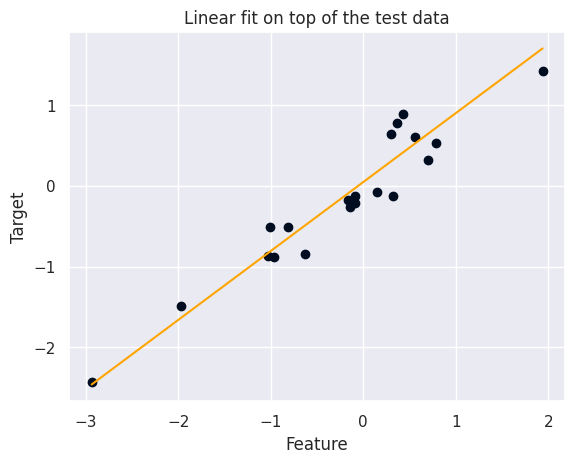

In [ ]:
sns.set()

plt.scatter(x_test_sorted,
            y_test_sorted,
            color = '#000C1F')

plt.plot(x_test_sorted,
         y_pred_lin_sorted,
         color = 'orange');


plt.title('Linear fit on top of the test data')

plt.xlabel('Feature')

plt.ylabel('Target');

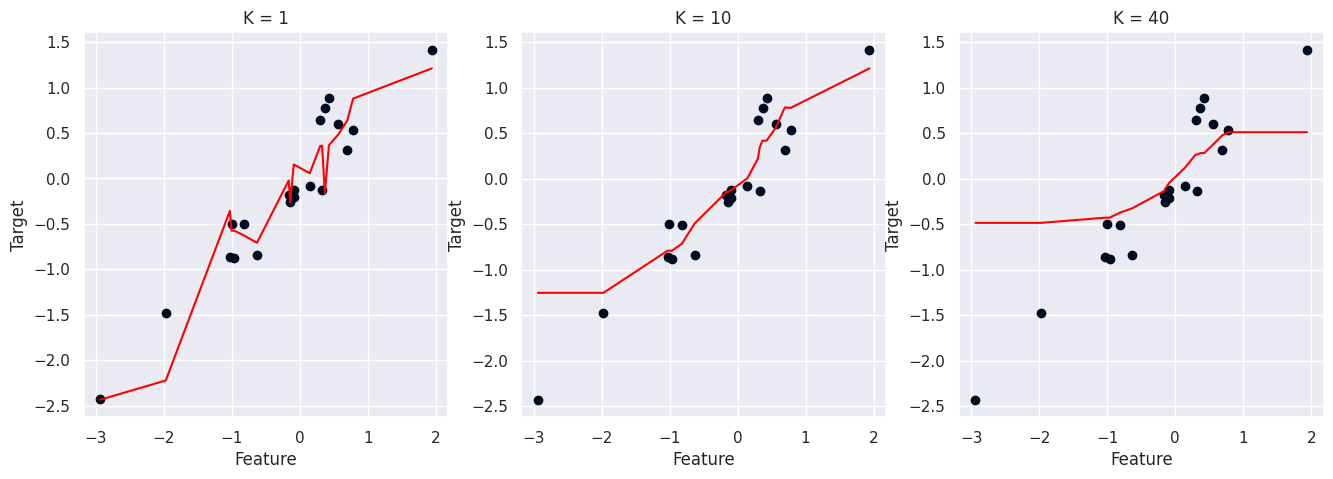

In [ ]:
sns.set()

# Create 3 subfigures aligned horizontally.
# The first figure will represent a KNN fit for K = 1.
# The second figure will represent a KNN fit for K = 10.
# The third figure will represent a KNN fit for K = 40.
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(16, 5))

# Plot the sorted true test targets versus the sorted test features. Choose a dark color.
# Plot these datapoint on all 3 figures.
ax1.scatter(x_test_sorted, y_test_sorted, color = '#000C1F')
ax2.scatter(x_test_sorted, y_test_sorted, color = '#000C1F')
ax3.scatter(x_test_sorted, y_test_sorted, color = '#000C1F')

# Plot as a line the sorted predicted test targets (for K = 1) versus the sorted test features.
# Choose a red color.
# Set a title and axes labels.
ax1.plot(x_test_sorted,
         y_pred_knn1_sorted,
         color = 'red')
ax1.set_title('K = 1')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

# Plot as a line the sorted predicted test targets (for K = 10) versus the sorted test features.
# Choose a red color.
# Set a title and axes labels.
ax2.plot(x_test_sorted,
         y_pred_knn10_sorted,
         color = 'red')
ax2.set_title('K = 10')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target')

# Plot as a line the sorted predicted test targets (for K = 40) versus the sorted test features.
# Choose a red color.
# Set a title and axes labels.
ax3.plot(x_test_sorted,
         y_pred_knn40_sorted,
         color = 'red')
ax3.set_title('K = 40')
ax3.set_xlabel('Feature')
ax3.set_ylabel('Target');

In [ ]:
# Choose a maximum number of nearest neighbors and add 1.
# That is, choose the value 41 to set a maximum value of 40.
# The reason we add the 1 is because this number is then used in a range() function in the following way:
# range(1, k)
# The range() function includes the first number but excludes the second one.
k = 41

# Create an array where all mean-squared error (MSE) values from the linear regression will be stored.
mse_lin = []

# Calculate the MSE value for the linear regression
mse_lin = mean_squared_error(y_test, y_test_pred)

# The MSE value calculated above is the same for all values of K.
# Therefore, we create an array storing that MSE value (k-1) many times.
# This will later be used to plot the MSE value versus the number of nearest neighbors.
mse_lin = [mse_lin]*(k-1)

# Create an array where all MSE values from the KNN regressions will be stored.
mse_knn = []

# Loop through all K-values
for i in range(1, k):

    # Create an instance of the KNN regression for the specified value of K
    reg_knn = KNeighborsRegressor(n_neighbors = i)

    # Fir the training data to the model
    reg_knn.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred_knn = reg_knn.predict(x_test)

    # Calculate the MSE value for this regression and store it in the array
    mse_knn.append(mean_squared_error(y_test, y_pred_knn))

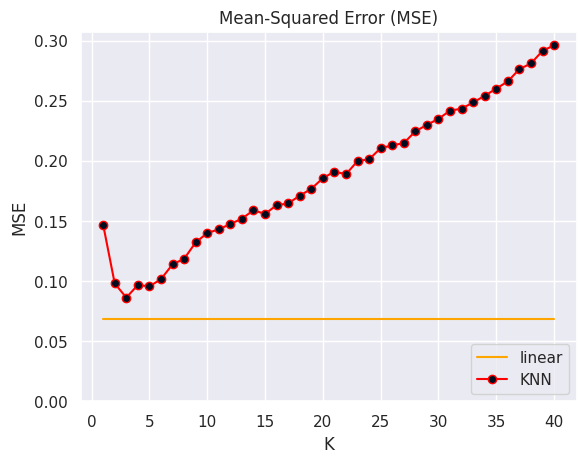

In [ ]:
# Set the seaborn visualization
sns.set()

# Create a placeholder for a figure
fig, ax = plt.subplots()

# Plot the MSE of the linear regression versus the value of K.
# Since the linear regression is not affected by the value of K, the output is a straight line.
# Choose a color.
# Choose a label which will describe the line in the legend
ax.plot(list(range(1, k)),
        mse_lin,
        color = 'orange',
        label = 'linear')

# Plot the MSE of the KNN regressions versus the value of K.
# Choose a color for the line.
# Use a marker to show the values of K.
# Choose a color for the marker
# Choose a label which will describe the line in the legend
ax.plot(list(range(1, k)),
        mse_knn,
        color = 'red',
        marker = 'o',
        markerfacecolor = '#000C1F',
        label = 'KNN')

# Place the legend in the lower right corner
ax.legend(loc='lower right')

# Set a title and axes labes
ax.set_title('Mean-Squared Error (MSE)')
ax.set_xlabel('K')
ax.set_ylabel('MSE')

# Set a minimum value of the y-axis
plt.ylim(0);